In [1]:
# Customer Analytics

In [126]:
from datetime import datetime, timedelta, date
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
retail=pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')

In [135]:
retail.shape

(541909, 8)

In [132]:
retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [3]:
#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split


In [4]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [5]:
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px

In [6]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [7]:
retail['InvoiceYearMonth'] = retail['InvoiceDate'].map(lambda date: 100*date.year + date.month)
retail['Revenue'] = retail['UnitPrice'] * retail['Quantity']
retail_revenue = retail.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()

In [136]:
plot_data = [
    go.Scatter(
        x=retail_revenue['InvoiceYearMonth'],
        y=retail_revenue['Revenue'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [137]:
#using pct_change() function to see monthly percentage change
retail_revenue['MonthlyGrowth'] = retail_revenue['Revenue'].pct_change()

#showing first 5 rows
retail_revenue.head()

#visualization - line graph
plot_data = [
    go.Scatter(
        x=retail_revenue.query("InvoiceYearMonth < 201112")['InvoiceYearMonth'],
        y=retail_revenue.query("InvoiceYearMonth < 201112")['MonthlyGrowth'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Growth Rate'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [10]:
#creating monthly active customers dataframe by counting unique Customer IDs
retail_monthly_active = retail.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

retail_monthly_active.head()

InvoiceYearMonth  CustomerID
0            201012         948
1            201101         783
2            201102         798
3            201103        1020
4            201104         899

In [11]:
#plotting the output
plot_data = [
    go.Bar(
        x=retail_monthly_active['InvoiceYearMonth'],
        y=retail_monthly_active['CustomerID'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Active Customers'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [12]:
#create a new dataframe for no. of order by using quantity field
retail_monthly_sales = retail.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

#print the dataframe
retail_monthly_sales.head()

InvoiceYearMonth  Quantity
0            201012    342228
1            201101    308966
2            201102    277989
3            201103    351872
4            201104    289098

In [13]:
#plot
plot_data = [
    go.Bar(
        x=retail_monthly_sales['InvoiceYearMonth'],
        y=retail_monthly_sales['Quantity'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Total # of Order'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [14]:
retail_min_purchase = retail.groupby('CustomerID').InvoiceDate.min().reset_index()
retail_min_purchase.columns = ['CustomerID','MinPurchaseDate']
retail_min_purchase['MinPurchaseYearMonth'] = retail_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)
retail_min_purchase.head()

CustomerID     MinPurchaseDate  MinPurchaseYearMonth
0     12346.0 2011-01-18 10:01:00                201101
1     12347.0 2010-12-07 14:57:00                201012
2     12348.0 2010-12-16 19:09:00                201012
3     12349.0 2011-11-21 09:51:00                201111
4     12350.0 2011-02-02 16:01:00                201102

In [15]:
retail = pd.merge(retail, retail_min_purchase, on='CustomerID')

retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   InvoiceYearMonth  Revenue     MinPurchaseDate  MinPurchaseYearMonth  
0            201012    15.30 2010-12-01 08:26:00                201012  
1            201012    20.34 2010-12-01 08:26:00                201012  
2            201012    22.00 2010-12-01 08:26:00                201012  
3            201012    20.34 2010-12-01 08:26:00                201012  
4            201012    20.34 2010-12-01 08:26:00                201012

In [16]:
retail['UserType'] = 'New'
retail.loc[retail['InvoiceYearMonth']>retail['MinPurchaseYearMonth'],'UserType'] = 'Existing'
retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   InvoiceYearMonth  Revenue     MinPurchaseDate  MinPurchaseYearMonth  \
0            201012    15.30 2010-12-01 08:26:00                201012   
1            201012    20.34 2010-12-01 08:26:00                201012   
2            201012    22.00 2010-12-01 08:26:00                201012   
3            201012    20.34 2010-12-01 08:26:00                201012   
4            201012    20.34 2010-12-01 08:26:00                201012   

  UserType  
0      New  
1      New  
2      New  
3      New  
4      New

In [17]:
#calculate the Revenue per month for each user type
retail_user_type_revenue = retail.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()
#filtering the dates and plot the result
retail_user_type_revenue = retail_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")
plot_data = [
    go.Scatter(
        x=retail_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'],
        y=retail_user_type_revenue.query("UserType == 'Existing'")['Revenue'],
        name = 'Existing'
    ),
    go.Scatter(
        x=retail_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'],
        y=retail_user_type_revenue.query("UserType == 'New'")['Revenue'],
        name = 'New'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='New vs Existing'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [18]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
retail_user_ratio = retail.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/retail.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
retail_user_ratio = retail_user_ratio.reset_index()
retail_user_ratio = retail_user_ratio.dropna()
retail_user_ratio

InvoiceYearMonth  CustomerID
1             201101    1.162983
2             201102    0.909091
3             201103    0.758621
4             201104    0.498333
5             201105    0.348750
6             201106    0.287990
7             201107    0.238155
8             201108    0.205412
9             201109    0.296813
10            201110    0.328052
11            201111    0.230935
12            201112    0.063566

In [19]:
plot_data = [
    go.Bar(
        x=retail_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['InvoiceYearMonth'],
        y=retail_user_ratio.query("InvoiceYearMonth>201101 and InvoiceYearMonth<201112")['CustomerID'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='New Customer Ratio'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [20]:
#identify which users are active by looking at their revenue per month
retail_user_purchase = retail.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()
retail_user_purchase.head()

CustomerID  InvoiceYearMonth  Revenue
0     12346.0            201101     0.00
1     12347.0            201012   711.79
2     12347.0            201101   475.39
3     12347.0            201104   636.25
4     12347.0            201106   382.52

In [21]:
#create retention matrix with crosstab
retail_retention = pd.crosstab(retail_user_purchase['CustomerID'], retail_user_purchase['InvoiceYearMonth']).reset_index()

retail_retention.head()

InvoiceYearMonth  CustomerID  201012  201101  201102  201103  201104  201105  \
0                    12346.0       0       1       0       0       0       0   
1                    12347.0       1       1       0       0       1       0   
2                    12348.0       1       1       0       0       1       0   
3                    12349.0       0       0       0       0       0       0   
4                    12350.0       0       0       1       0       0       0   

InvoiceYearMonth  201106  201107  201108  201109  201110  201111  201112  
0                      0       0       0       0       0       0       0  
1                      1       0       1       0       1       0       1  
2                      0       0       0       1       0       0       0  
3                      0       0       0       0       0       1       0  
4                      0       0       0       0       0       0       0

In [22]:
#create an array of dictionary which keeps Retained & Total User count for each month
months = retail_retention.columns[2:]
retention_array = []
for i in range(len(months)-1):
    retention_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = retail_retention[selected_month].sum()
    retention_data['RetainedUserCount'] = retail_retention[(retail_retention[selected_month]>0) & (retail_retention[prev_month]>0)][selected_month].sum()
    retention_array.append(retention_data)
    
#convert the array to dataframe and calculate Retention Rate
retail_retention = pd.DataFrame(retention_array)
retail_retention['RetentionRate'] = retail_retention['RetainedUserCount']/retail_retention['TotalUserCount']
retail_retention.head()

InvoiceYearMonth  RetainedUserCount  TotalUserCount  RetentionRate
0            201102                299             798       0.374687
1            201103                345            1020       0.338235
2            201104                346             899       0.384872
3            201105                399            1079       0.369787
4            201106                464            1051       0.441484

In [23]:


#plot the retention rate graph
plot_data = [
    go.Scatter(
        x=retail_retention.query("InvoiceYearMonth<201112")['InvoiceYearMonth'],
        y=retail_retention.query("InvoiceYearMonth<201112")['RetentionRate'],
        name="organic"
    )
    
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Retention Rate'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


In [24]:
#create our retention table again with crosstab() - we need to change the column names for using them in .query() function
retail_retention = pd.crosstab(retail_user_purchase['CustomerID'], retail_user_purchase['InvoiceYearMonth']).reset_index()
new_column_names = [ 'm_' + str(column) for column in retail_retention.columns]
retail_retention.columns = new_column_names

#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count =  retention_data['TotalUserCount'] = retail_retention['m_' + str(selected_month)].sum()
    retention_data[selected_month] = 1 
    
    query = "{} > 0".format('m_' + str(selected_month))
    

    for next_month in next_months:
        query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(retail_retention.query(query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
retail_retention = pd.DataFrame(retention_array)
retail_retention.index = months

#showing new cohort based retention table
retail_retention


TotalUserCount  201101  201102  201103  201104  201105  \
InvoiceYearMonth                                                           
201101                       783     1.0    0.38    0.26    0.17    0.15   
201102                       798     NaN    1.00    0.43    0.23    0.19   
201103                      1020     NaN     NaN    1.00    0.34    0.23   
201104                       899     NaN     NaN     NaN    1.00    0.44   
201105                      1079     NaN     NaN     NaN     NaN    1.00   
201106                      1051     NaN     NaN     NaN     NaN     NaN   
201107                       993     NaN     NaN     NaN     NaN     NaN   
201108                       980     NaN     NaN     NaN     NaN     NaN   
201109                      1302     NaN     NaN     NaN     NaN     NaN   
201110                      1425     NaN     NaN     NaN     NaN     NaN   
201111                      1711     NaN     NaN     NaN     NaN     NaN   
201112                       686     NaN     NaN     NaN     NaN     NaN   

                  201106  201107  201108  201109  201110  201111  201112  
InvoiceYearMonth                                                          
201101              0.13    0.12    0.10    0.10    0.08    0.08    0.07  
201102              0.16    0.14    0.12    0.11    0.10    0.09    0.07  
201103              0.17    0.13    0.11    0.11    0.09    0.09    0.06  
201104              0.28    0.20    0.16    0.14    0.12    0.11    0.08  
201105              0.43    0.25    0.19    0.15    0.13    0.12    0.08  
201106              1.00    0.39    0.25    0.19    0.14    0.13    0.09  
201107               NaN    1.00    0.44    0.27    0.19    0.17    0.11  
201108               NaN     NaN    1.00    0.47    0.27    0.23    0.14  
201109               NaN     NaN     NaN    1.00    0.42    0.29    0.15  
201110               NaN     NaN     NaN     NaN    1.00    0.48    0.19  
201111               NaN     NaN     NaN     NaN     NaN    1.00    0.26  
201112               NaN     NaN     NaN     NaN     NaN     NaN    1.00

In [25]:
recent_purchase = retail.groupby('CustomerID').InvoiceDate.max().reset_index()
recent_purchase = recent_purchase.rename(columns={"InvoiceDate": "MaxPurchaseDate"})
recent_purchase.head()

CustomerID     MaxPurchaseDate
0     12346.0 2011-01-18 10:17:00
1     12347.0 2011-12-07 15:52:00
2     12348.0 2011-09-25 13:13:00
3     12349.0 2011-11-21 09:51:00
4     12350.0 2011-02-02 16:01:00

In [26]:
#we take our observation point as the max invoice date (day0) in our dataset
recent_purchase['Recency'] = (recent_purchase['MaxPurchaseDate'].max() - recent_purchase['MaxPurchaseDate']).dt.days
recent_purchase.head()

CustomerID     MaxPurchaseDate  Recency
0     12346.0 2011-01-18 10:17:00      325
1     12347.0 2011-12-07 15:52:00        1
2     12348.0 2011-09-25 13:13:00       74
3     12349.0 2011-11-21 09:51:00       18
4     12350.0 2011-02-02 16:01:00      309

In [27]:
plot_data = [
    go.Histogram(
        x=recent_purchase['Recency']
    )
]
plot_layout = go.Layout(
        title='Recency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

d:\Anaconda3\

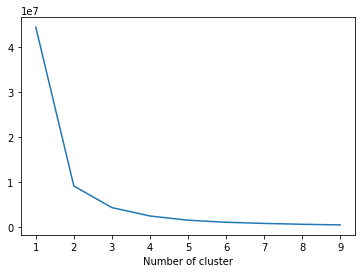

In [28]:
from sklearn.cluster import KMeans

sse={}
uk_recency = recent_purchase[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(uk_recency)
    uk_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [29]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
kmeans.fit(uk_recency)
recent_purchase['RecencyCluster'] = kmeans.predict(uk_recency)

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

recent_purchase = order_cluster('RecencyCluster', 'Recency',recent_purchase,False)

In [30]:
recent_purchase.head()

CustomerID     MaxPurchaseDate  Recency  RecencyCluster
0     12346.0 2011-01-18 10:17:00      325               0
1     12350.0 2011-02-02 16:01:00      309               0
2     12361.0 2011-02-25 13:51:00      286               0
3     12365.0 2011-02-21 14:04:00      290               0
4     12373.0 2011-02-01 13:10:00      310               0

In [31]:
frequent_purchase = retail.groupby('CustomerID').InvoiceDate.count().reset_index()
frequent_purchase = frequent_purchase.rename(columns={"InvoiceDate": "Frequency"})
frequent_purchase.head()

CustomerID  Frequency
0     12346.0          2
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17

In [32]:
#plot the histogram
plot_data = [
    go.Histogram(
        x=frequent_purchase.query('Frequency < 1000')['Frequency']
    )
]

plot_layout = go.Layout(
        title='Frequency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [33]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(frequent_purchase[['Frequency']])
frequent_purchase['FrequencyCluster'] = kmeans.predict(frequent_purchase[['Frequency']])

#order the frequency cluster
frequent_purchase = order_cluster('FrequencyCluster', 'Frequency',frequent_purchase,True)

#see details of each cluster
frequent_purchase.groupby('FrequencyCluster')['Frequency'].describe()

count         mean          std     min     25%     50%  \
FrequencyCluster                                                             
0                 3862.0    49.753755    44.812998     1.0    15.0    34.0   
1                  482.0   329.107884   132.670589   190.0   228.0   286.0   
2                   24.0  1349.750000   508.637759   872.0  1003.5  1156.0   
3                    4.0  5914.000000  1473.845537  4642.0  5006.5  5515.5   

                     75%     max  
FrequencyCluster                  
0                   73.0   189.0  
1                  393.5   803.0  
2                 1541.0  2782.0  
3                 6423.0  7983.0

In [34]:
#calculate revenue for each customer
retail['Revenue'] = retail['UnitPrice'] * retail['Quantity']
retail_revenue_purchase = retail.groupby('CustomerID').Revenue.sum().reset_index()

retail_revenue_purchase.head()

CustomerID  Revenue
0     12346.0     0.00
1     12347.0  4310.00
2     12348.0  1797.24
3     12349.0  1757.55
4     12350.0   334.40

In [35]:
#plot the histogram
plot_data = [
    go.Histogram(
        x=retail_revenue_purchase.query('Revenue < 10000')['Revenue']
    )
]

plot_layout = go.Layout(
        title='Monetary Value'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [36]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(retail_revenue_purchase[['Revenue']])
retail_revenue_purchase['RevenueCluster'] = kmeans.predict(retail_revenue_purchase[['Revenue']])


#order the cluster numbers
retail_revenue_purchase = order_cluster('RevenueCluster', 'Revenue',retail_revenue_purchase,True)

#show details of the dataframe
retail_revenue_purchase.groupby('RevenueCluster')['Revenue'].describe()

count           mean           std        min        25%  \
RevenueCluster                                                              
0               4237.0    1136.543480   1345.528154   -4287.63     284.55   
1                117.0   14442.467265   7476.098047    7792.36    9231.20   
2                 15.0   71423.516000  28632.631870   50415.49   52287.28   
3                  3.0  241136.560000  47874.073443  187482.17  221960.33   

                      50%         75%        max  
RevenueCluster                                    
0                  621.66    1452.870    7741.47  
1                11341.10   16389.740   40340.78  
2                57385.88   77008.730  132572.62  
3               256438.49  267963.755  279489.02

In [37]:
recent_purchase.head()

CustomerID     MaxPurchaseDate  Recency  RecencyCluster
0     12346.0 2011-01-18 10:17:00      325               0
1     12350.0 2011-02-02 16:01:00      309               0
2     12361.0 2011-02-25 13:51:00      286               0
3     12365.0 2011-02-21 14:04:00      290               0
4     12373.0 2011-02-01 13:10:00      310               0

In [38]:
frequent_purchase.head()

CustomerID  Frequency  FrequencyCluster
0     12346.0          2                 0
1     12347.0        182                 0
2     12348.0         31                 0
3     12349.0         73                 0
4     12350.0         17                 0

In [39]:
df = recent_purchase.merge(frequent_purchase, on ='CustomerID').merge(retail_revenue_purchase, on ='CustomerID')
df.head()

CustomerID     MaxPurchaseDate  Recency  RecencyCluster  Frequency  \
0     12346.0 2011-01-18 10:17:00      325               0          2   
1     12350.0 2011-02-02 16:01:00      309               0         17   
2     12361.0 2011-02-25 13:51:00      286               0         10   
3     12365.0 2011-02-21 14:04:00      290               0         23   
4     12373.0 2011-02-01 13:10:00      310               0         14   

   FrequencyCluster  Revenue  RevenueCluster  
0                 0     0.00               0  
1                 0   334.40               0  
2                 0   189.90               0  
3                 0   320.69               0  
4                 0   364.60               0

In [40]:
#calculate overall score and use mean() to see details
df['OverallScore'] = df['RecencyCluster'] + df['FrequencyCluster'] + df['RevenueCluster']
df.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()


Recency    Frequency        Revenue
OverallScore                                        
0             308.520710    22.242604     347.046923
1             189.731392    33.074434     536.237510
2              81.398398    46.515516     911.774456
3              21.172276    69.945807    1236.218728
4              13.509091   302.438961    4380.503506
5               7.400000   491.435294   13810.254706
6               7.307692   985.230769   38669.643077
7               2.555556  2432.555556   98056.746667
8               1.333333  4372.000000  156394.183333

In [41]:
df['Segment'] = 'Low-Value'
df.loc[df['OverallScore']>2,'Segment'] = 'Mid-Value' 
df.loc[df['OverallScore']>4,'Segment'] = 'High-Value' 

In [42]:


#Revenue vs Frequency
df_graph = df.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=df_graph.query("Segment == 'Low-Value'")['Frequency'],
        y=df_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=df_graph.query("Segment == 'Mid-Value'")['Frequency'],
        y=df_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=df_graph.query("Segment == 'High-Value'")['Frequency'],
        y=df_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


In [43]:
#Revenue Recency

df_graph = df.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=df_graph.query("Segment == 'Low-Value'")['Recency'],
        y=df_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=df_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=df_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=df_graph.query("Segment == 'High-Value'")['Recency'],
        y=df_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


In [44]:
#Revenue Frequency

df_graph = df.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=df_graph.query("Segment == 'Low-Value'")['Frequency'],
        y=df_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=df_graph.query("Segment == 'Mid-Value'")['Frequency'],
        y=df_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=df_graph.query("Segment == 'High-Value'")['Frequency'],
        y=df_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


In [45]:
df_graph = df.query("Revenue < 50000 and Frequency < 2000")
fig = px.scatter_3d(df, x='Recency', y='Frequency', z='Revenue',
              color='Segment')
fig.show()

In [46]:

#create 3m and 6m dataframes
re_3m = retail[(retail.InvoiceDate < date(2011,6,1)) & (retail.InvoiceDate >= date(2011,3,1))].reset_index(drop=True)
re_6m = retail[(retail.InvoiceDate >= date(2011,6,1)) & (retail.InvoiceDate < date(2011,12,1))].reset_index(drop=True)

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.



In [47]:
#create tx_user for assigning clustering
retail = pd.DataFrame(re_3m['CustomerID'].unique())
retail.columns = ['CustomerID']

In [48]:
#calculate recency score
detail_max_purchase = re_3m.groupby('CustomerID').InvoiceDate.max().reset_index()
detail_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
detail_max_purchase['Recency'] = (detail_max_purchase['MaxPurchaseDate'].max() - detail_max_purchase['MaxPurchaseDate']).dt.days
retail= pd.merge(retail, detail_max_purchase[['CustomerID','Recency']], on='CustomerID')

In [49]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(retail[['Recency']])
retail['RecencyCluster'] = kmeans.predict(retail[['Recency']])

retail = order_cluster('RecencyCluster', 'Recency',retail,False)

In [50]:
frequent_purchase = re_3m.groupby('CustomerID').InvoiceDate.count().reset_index()
frequent_purchase = frequent_purchase.rename(columns={"InvoiceDate": "Frequency"})

In [51]:
#k-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(frequent_purchase[['Frequency']])
frequent_purchase['FrequencyCluster'] = kmeans.predict(frequent_purchase[['Frequency']])

#order the frequency cluster
frequent_purchase = order_cluster('FrequencyCluster', 'Frequency',frequent_purchase,True)

#see details of each cluster
frequent_purchase.groupby('FrequencyCluster')['Frequency'].describe()

count         mean         std     min      25%     50%  \
FrequencyCluster                                                             
0                 1761.0    24.254401   17.522583     1.0    10.00    20.0   
1                  252.0   114.984127   43.907724    70.0    81.00   103.0   
2                   12.0   482.166667  129.263532   330.0   395.25   444.0   
3                    2.0  1227.000000  193.747258  1090.0  1158.50  1227.0   

                     75%     max  
FrequencyCluster                  
0                   35.0    69.0  
1                  130.0   285.0  
2                  564.0   730.0  
3                 1295.5  1364.0

In [52]:
retail = pd.merge(retail, frequent_purchase, on='CustomerID')

In [53]:
re_3m['Revenue'] = re_3m['UnitPrice'] * re_3m['Quantity']
retail_revenue_purchase = re_3m.groupby('CustomerID').Revenue.sum().reset_index()

In [54]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(retail_revenue_purchase[['Revenue']])
retail_revenue_purchase['RevenueCluster'] = kmeans.predict(retail_revenue_purchase[['Revenue']])

#order the cluster numbers
retail_revenue_purchase = order_cluster('RevenueCluster', 'Revenue',retail_revenue_purchase,True)

In [55]:
retail = pd.merge(retail, retail_revenue_purchase, on='CustomerID')

In [56]:
retail.head()

CustomerID  Recency  RecencyCluster  Frequency  FrequencyCluster  Revenue  \
0     13047.0       27               2         42                 0   831.10   
1     17809.0       25               2          3                 0   789.00   
2     17548.0       25               2         10                 0     0.00   
3     13448.0       20               2         38                 0   590.77   
4     14307.0       27               2         28                 0   424.42   

   RevenueCluster  
0               0  
1               0  
2               0  
3               0  
4               0

In [57]:
df = retail

In [58]:
#calculate overall score and use mean() to see details
df['OverallScore'] = df['RecencyCluster'] + df['FrequencyCluster'] + df['RevenueCluster']
df.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

Recency   Frequency       Revenue
OverallScore                                     
0             77.035230   18.710027    315.946369
1             50.974082   24.276458    380.652765
2             26.906114   30.855895    530.957555
3             10.252319   36.671614    673.167236
4              8.342857  102.228571   2009.308079
5              6.789474  131.315789   4593.330000
6              7.428571  333.071429  11608.785714
7              5.000000  625.250000  15806.747500
8              5.000000  710.000000  36910.870000

In [59]:
df['Segment'] = 'Low-Value'
df.loc[df['OverallScore']>2,'Segment'] = 'Mid-Value' 
df.loc[df['OverallScore']>4,'Segment'] = 'High-Value' 

In [60]:
df.head()

CustomerID  Recency  RecencyCluster  Frequency  FrequencyCluster  Revenue  \
0     13047.0       27               2         42                 0   831.10   
1     17809.0       25               2          3                 0   789.00   
2     17548.0       25               2         10                 0     0.00   
3     13448.0       20               2         38                 0   590.77   
4     14307.0       27               2         28                 0   424.42   

   RevenueCluster  OverallScore    Segment  
0               0             2  Low-Value  
1               0             2  Low-Value  
2               0             2  Low-Value  
3               0             2  Low-Value  
4               0             2  Low-Value

In [61]:
re_6m['Revenue'] = re_6m['UnitPrice'] * re_6m['Quantity']
retail_revenue_purchase_6m = re_6m.groupby('CustomerID')['Revenue'].sum().reset_index()
retail_revenue_purchase_6m.columns = ['CustomerID','m6_Revenue']

In [62]:
retail_revenue_purchase_6m.head()

CustomerID  m6_Revenue
0     12347.0     2261.75
1     12348.0      310.00
2     12349.0     1757.55
3     12352.0      944.23
4     12356.0       58.35

In [63]:
df = pd.merge(df, retail_revenue_purchase_6m, on='CustomerID', how='left')
df = df.fillna(0)

df.head()

CustomerID  Recency  RecencyCluster  Frequency  FrequencyCluster  Revenue  \
0     13047.0       27               2         42                 0   831.10   
1     17809.0       25               2          3                 0   789.00   
2     17548.0       25               2         10                 0     0.00   
3     13448.0       20               2         38                 0   590.77   
4     14307.0       27               2         28                 0   424.42   

   RevenueCluster  OverallScore    Segment  m6_Revenue  
0               0             2  Low-Value     1425.42  
1               0             2  Low-Value     1976.92  
2               0             2  Low-Value        0.00  
3               0             2  Low-Value     2086.36  
4               0             2  Low-Value     1300.74

In [64]:
df_graph = df.query("m6_Revenue < 30000")

In [65]:
plot_data = [
    go.Scatter(
        x=df_graph.query("Segment == 'Low-Value'")['OverallScore'],
        y=df_graph.query("Segment == 'Low-Value'")['m6_Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=df_graph.query("Segment == 'Mid-Value'")['OverallScore'],
        y=df_graph.query("Segment == 'Mid-Value'")['m6_Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=df_graph.query("Segment == 'High-Value'")['OverallScore'],
        y=df_graph.query("Segment == 'High-Value'")['m6_Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "6m LTV"},
        xaxis= {'title': "RFM Score"},
        title='LTV'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [66]:
#remove outliers
df = df[df['m6_Revenue']<df['m6_Revenue'].quantile(0.99)]

In [67]:
#creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['m6_Revenue']])
df['LTVCluster'] = kmeans.predict(df[['m6_Revenue']])

#order cluster number based on LTV
df = order_cluster('LTVCluster', 'm6_Revenue',df,True)

#creatinga new cluster dataframeb

cluster = df.copy()

#see details of the clusters
cluster.groupby('LTVCluster')['m6_Revenue'].describe()

count          mean          std      min        25%        50%  \
LTVCluster                                                                     
0           1712.0    560.985345   597.377543  -609.40     0.0000    367.675   
1            268.0   3741.817052  1438.947883  2152.80  2609.7800   3338.380   
2             26.0  12377.135000  3210.865481  8439.09  9607.3225  11861.385   

                   75%       max  
LTVCluster                        
0             942.2525   2139.44  
1            4359.9775   7946.90  
2           13745.0575  19289.53

In [68]:
#convert categorical columns to numerical
classes = pd.get_dummies(cluster)

#calculate and show correlations
corr_matrix = classes.corr()
corr_matrix['LTVCluster'].sort_values(ascending=False)

#create X and y, X will be feature set and y is the label - LTV
X = classes.drop(['LTVCluster','m6_Revenue'],axis=1)
y = classes['LTVCluster']

#split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

In [69]:
cluster.corr()

CustomerID   Recency  RecencyCluster  Frequency  \
CustomerID          1.000000 -0.001874        0.007522  -0.040818   
Recency            -0.001874  1.000000       -0.965532  -0.255874   
RecencyCluster      0.007522 -0.965532        1.000000   0.251093   
Frequency          -0.040818 -0.255874        0.251093   1.000000   
FrequencyCluster   -0.001945 -0.222366        0.215886   0.784835   
Revenue            -0.093728 -0.292361        0.291418   0.498819   
RevenueCluster     -0.083503 -0.167191        0.163043   0.358383   
OverallScore       -0.008171 -0.910605        0.937569   0.483418   
m6_Revenue         -0.079498 -0.231527        0.231857   0.399429   
LTVCluster         -0.089212 -0.210401        0.212272   0.366266   

                  FrequencyCluster   Revenue  RevenueCluster  OverallScore  \
CustomerID               -0.001945 -0.093728       -0.083503     -0.008171   
Recency                  -0.222366 -0.292361       -0.167191     -0.910605   
RecencyCluster            0.215886  0.291418        0.163043      0.937569   
Frequency                 0.784835  0.498819        0.358383      0.483418   
FrequencyCluster          1.000000  0.448467        0.322361      0.504617   
Revenue                   0.448467  1.000000        0.799853      0.502613   
RevenueCluster            0.322361  0.799853        1.000000      0.393299   
OverallScore              0.504617  0.502613        0.393299      1.000000   
m6_Revenue                0.377175  0.715238        0.613801      0.401507   
LTVCluster                0.361812  0.594055        0.497247      0.361083   

                  m6_Revenue  LTVCluster  
CustomerID         -0.079498   -0.089212  
Recency            -0.231527   -0.210401  
RecencyCluster      0.231857    0.212272  
Frequency           0.399429    0.366266  
FrequencyCluster    0.377175    0.361812  
Revenue             0.715238    0.594055  
RevenueCluster      0.613801    0.497247  
OverallScore        0.401507    0.361083  
m6_Revenue          1.000000    0.849646  
LTVCluster          0.849646    1.000000

In [70]:
#XGBoost Multiclassification Model
ltv_xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1,objective= 'multi:softprob',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(ltv_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(ltv_xgb_model.score(X_test[X_train.columns], y_test)))

y_pred = ltv_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of XGB classifier on training set: 0.95
Accuracy of XGB classifier on test set: 0.84
              precision    recall  f1-score   support

           0       0.88      0.95      0.92        87
           1       0.29      0.15      0.20        13
           2       0.00      0.00      0.00         1

    accuracy                           0.84       101
   macro avg       0.39      0.37      0.37       101
weighted avg       0.80      0.84      0.82       101



d:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [71]:
y_pred_prob = ltv_xgb_model.predict_proba(X_test)

In [72]:
# Compute ROC curve and ROC area for each class
fp = dict()
tp = dict()
thres = dict()
roc_auc = dict()

In [73]:
for i in range(3):
    fpr, tpr, thresholds = metrics.roc_curve(pd.get_dummies(y_test)[i], y_pred_prob[:, i])
    fp[i] = np.round(fpr,2)
    tp[i] = np.round(tpr,2) 
    thres[i] = np.round(thresholds,2)
    roc_auc[i] = np.round(metrics.auc(fpr, tpr),2)

In [74]:
plot_data = [
    go.Scatter(
        x=fp[0],
        y=tp[0],
        name='Low AUC: '+str(roc_auc[0]),
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.9
           )
    ),
        go.Scatter(
        x=fp[1],
        y=tp[1],
        name='Mid AUC: '+str(roc_auc[1]),
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'green',
            opacity= 0.9
           )
    ),
        go.Scatter(
        x=fp[2],
        y=tp[2],
        name='High AUC: '+str(roc_auc[2]),
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "True Positive"},
        xaxis= {'title': "False Positive"},
        title='ROC curve'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [75]:
retail.head()

CustomerID  Recency  RecencyCluster  Frequency  FrequencyCluster  Revenue  \
0     13047.0       27               2         42                 0   831.10   
1     17809.0       25               2          3                 0   789.00   
2     17548.0       25               2         10                 0     0.00   
3     13448.0       20               2         38                 0   590.77   
4     14307.0       27               2         28                 0   424.42   

   RevenueCluster  OverallScore    Segment  
0               0             2  Low-Value  
1               0             2  Low-Value  
2               0             2  Low-Value  
3               0             2  Low-Value  
4               0             2  Low-Value

In [76]:
df.head()

CustomerID  Recency  RecencyCluster  Frequency  FrequencyCluster  Revenue  \
0     13047.0       27               2         42                 0   831.10   
1     17809.0       25               2          3                 0   789.00   
2     17548.0       25               2         10                 0     0.00   
3     13448.0       20               2         38                 0   590.77   
4     14307.0       27               2         28                 0   424.42   

   RevenueCluster  OverallScore    Segment  m6_Revenue  LTVCluster  
0               0             2  Low-Value     1425.42           0  
1               0             2  Low-Value     1976.92           0  
2               0             2  Low-Value        0.00           0  
3               0             2  Low-Value     2086.36           0  
4               0             2  Low-Value     1300.74           0

In [77]:
df_table = df

In [78]:
pivot = df_table.pivot_table(values='CustomerID', index=['Segment','LTVCluster'], aggfunc='count').unstack().reindex(['Low-Value','Mid-Value', 'High-Value'], axis=0)
pivot.columns = ['Low-LTV','Median-LTV','High-LTV']

In [79]:
pivot

Low-LTV  Median-LTV  High-LTV
Segment                                  
Low-Value      1186         101         3
Mid-Value       523         139        10
High-Value        3          28        13

In [80]:
revenue_total = df['m6_Revenue'].sum()

In [81]:
revenue_high = df[(df['LTVCluster']==2) & (df['Segment']=='High-Value')]['m6_Revenue'].sum()

In [82]:
df[(df['LTVCluster']==2) & (df['Segment']=='High-Value')].CustomerID

1986    13408.0
1987    13767.0
1988    15513.0
1989    12748.0
1990    12921.0
1992    12471.0
1993    13798.0
1995    13081.0
1996    16422.0
1998    17675.0
2000    15189.0
2001    13098.0
2002    16333.0
Name: CustomerID, dtype: float64

In [83]:
round(13/df['m6_Revenue'].count(),4)

0.0065

In [84]:
df['m6_Revenue'].count()

2006

In [85]:
contri_ratio = revenue_high/revenue_total
round(contri_ratio,4)

0.0732

In [86]:
# Pretty loyal customers for promotion


In [87]:
retail=pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')

In [88]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
rm_6m = retail[(retail.InvoiceDate < date(2011,9,1)) & (retail.InvoiceDate >= date(2011,3,1))].reset_index(drop=True)
rm_next = retail[(retail.InvoiceDate >= date(2011,9,1)) & (retail.InvoiceDate < date(2011,12,1))].reset_index(drop=True)

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.



In [89]:
rm_next.head()

InvoiceNo StockCode                 Description  Quantity  \
0    565080     20677          PINK POLKADOT BOWL         8   
1    565080     22128  PARTY CONES CANDY ASSORTED        24   
2    565081     21067                         NaN         1   
3    565082     22423    REGENCY CAKESTAND 3 TIER         2   
4    565082    15060B  FAIRY CAKE DESIGN UMBRELLA         8   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2011-09-01 08:25:00       1.25     13509.0  United Kingdom  
1 2011-09-01 08:25:00       1.25     13509.0  United Kingdom  
2 2011-09-01 09:03:00       0.00         NaN  United Kingdom  
3 2011-09-01 09:15:00      12.75     13305.0  United Kingdom  
4 2011-09-01 09:15:00       3.75     13305.0  United Kingdom

In [90]:
rm_6m.head()

InvoiceNo StockCode                          Description  Quantity  \
0    545220     21955    DOORMAT UNION JACK GUNS AND ROSES         2   
1    545220     48194                       DOORMAT HEARTS         2   
2    545220     22556       PLASTERS IN TIN CIRCUS PARADE         12   
3    545220     22139     RETROSPOT TEA SET CERAMIC 11 PC          3   
4    545220    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         4   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2011-03-01 08:30:00       7.95     14620.0  United Kingdom  
1 2011-03-01 08:30:00       7.95     14620.0  United Kingdom  
2 2011-03-01 08:30:00       1.65     14620.0  United Kingdom  
3 2011-03-01 08:30:00       4.95     14620.0  United Kingdom  
4 2011-03-01 08:30:00       3.75     14620.0  United Kingdom

In [91]:
user = pd.DataFrame(rm_6m['CustomerID'].unique())
user.columns = ['CustomerID']


In [92]:
#create a dataframe with customer id and first purchase date in tx_next
next_first_purchase = rm_next.groupby('CustomerID').InvoiceDate.min().reset_index()
next_first_purchase.columns = ['CustomerID','MinPurchaseDate']

#create a dataframe with customer id and last purchase date in tx_6m
last_purchase = rm_6m.groupby('CustomerID').InvoiceDate.max().reset_index()
last_purchase.columns = ['CustomerID','MaxPurchaseDate']

#merge two dataframes
purchase_dates = pd.merge(last_purchase,next_first_purchase,on='CustomerID',how='left')

#calculate the time difference in days:
purchase_dates['NextPurchaseDay'] = (purchase_dates['MinPurchaseDate'] - purchase_dates['MaxPurchaseDate']).dt.days

#merge with tx_user 
user = pd.merge(user, purchase_dates[['CustomerID','NextPurchaseDay']],on='CustomerID',how='left')

#print tx_user
user.head()

#fill NA values with 999
user = user.fillna(999)


In [93]:
tx_user = user

In [94]:
from sklearn.cluster import KMeans
#get max purchase date for Recency and create a dataframe
tx_max_purchase = rm_6m.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

#find the recency in days and add it to tx_user
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')


#clustering for Recency
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


#order recency clusters
tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

#print cluster characteristics
tx_user.groupby('RecencyCluster')['Recency'].describe()


#get total purchases for frequency scores
tx_frequency = rm_6m.groupby('CustomerID').InvoiceDate.count().reset_index()
tx_frequency.columns = ['CustomerID','Frequency']

#add frequency column to tx_user
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')



#clustering for frequency
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

#order frequency clusters and show the characteristics
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)
tx_user.groupby('FrequencyCluster')['Frequency'].describe()


#calculate monetary value, create a dataframe with it
rm_6m['Revenue'] = rm_6m['UnitPrice'] * rm_6m['Quantity']
tx_revenue = rm_6m.groupby('CustomerID').Revenue.sum().reset_index()

#add Revenue column to tx_user
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')



#Revenue clusters 
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])

#ordering clusters and who the characteristics
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

tx_user.groupby('RevenueCluster')['Revenue'].describe()


#building overall segmentation
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']

#assign segment names
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 

In [95]:
tx_user.head()

CustomerID  NextPurchaseDay  Recency  RecencyCluster  Frequency  \
0     14620.0            999.0      104               1         30   
1     14740.0            999.0       91               1         93   
2     16462.0            111.0       85               1          2   
3     15676.0            178.0      113               1         63   
4     15092.0            999.0      115               1         26   

   FrequencyCluster  Revenue  RevenueCluster  OverallScore    Segment  
0                 0   393.28               0             1  Low-Value  
1                 0  1423.21               0             1  Low-Value  
2                 0    68.00               0             1  Low-Value  
3                 0   877.40               0             1  Low-Value  
4                 0   457.81               0             1  Low-Value

In [96]:
#create a dataframe with CustomerID and Invoice Date
tx_day_order = rm_6m[['CustomerID','InvoiceDate']]
#convert Invoice Datetime to day
tx_day_order['InvoiceDay'] = rm_6m['InvoiceDate'].dt.date
tx_day_order = tx_day_order.sort_values(['CustomerID','InvoiceDate'])
#drop duplicates
tx_day_order = tx_day_order.drop_duplicates(subset=['CustomerID','InvoiceDay'],keep='first')

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [97]:
tx_day_order.head()

CustomerID         InvoiceDate  InvoiceDay
42950      12347.0 2011-04-07 10:43:00  2011-04-07
115237     12347.0 2011-06-09 13:01:00  2011-06-09
181286     12347.0 2011-08-02 08:48:00  2011-08-02
40678      12348.0 2011-04-05 10:47:00  2011-04-05
974        12352.0 2011-03-01 14:57:00  2011-03-01

In [98]:
#moving windows
#shifting last 3 purchase dates
tx_day_order['PrevInvoiceDate'] = tx_day_order.groupby('CustomerID')['InvoiceDay'].shift(1)
tx_day_order['T2InvoiceDate'] = tx_day_order.groupby('CustomerID')['InvoiceDay'].shift(2)
tx_day_order['T3InvoiceDate'] = tx_day_order.groupby('CustomerID')['InvoiceDay'].shift(3)

In [99]:
tx_day_order['DayDiff'] = (tx_day_order['InvoiceDay'] - tx_day_order['PrevInvoiceDate']).dt.days
tx_day_order['DayDiff2'] = (tx_day_order['InvoiceDay'] - tx_day_order['T2InvoiceDate']).dt.days
tx_day_order['DayDiff3'] = (tx_day_order['InvoiceDay'] - tx_day_order['T3InvoiceDate']).dt.days

In [100]:
tx_day_order.head()

CustomerID         InvoiceDate  InvoiceDay PrevInvoiceDate  \
42950      12347.0 2011-04-07 10:43:00  2011-04-07             NaN   
115237     12347.0 2011-06-09 13:01:00  2011-06-09      2011-04-07   
181286     12347.0 2011-08-02 08:48:00  2011-08-02      2011-06-09   
40678      12348.0 2011-04-05 10:47:00  2011-04-05             NaN   
974        12352.0 2011-03-01 14:57:00  2011-03-01             NaN   

       T2InvoiceDate T3InvoiceDate  DayDiff  DayDiff2  DayDiff3  
42950            NaN           NaN      NaN       NaN       NaN  
115237           NaN           NaN     63.0       NaN       NaN  
181286    2011-04-07           NaN     54.0     117.0       NaN  
40678            NaN           NaN      NaN       NaN       NaN  
974              NaN           NaN      NaN       NaN       NaN

In [101]:
tx_day_diff = tx_day_order.groupby('CustomerID').agg({'DayDiff': ['mean','std']}).reset_index()
tx_day_diff.columns = ['CustomerID', 'DayDiffMean','DayDiffStd']
tx_day_diff.head()

CustomerID  DayDiffMean  DayDiffStd
0     12347.0         58.5    6.363961
1     12348.0          NaN         NaN
2     12352.0         10.5    7.778175
3     12353.0          NaN         NaN
4     12354.0          NaN         NaN

In [102]:
tx_day_order_last = tx_day_order.drop_duplicates(subset=['CustomerID'],keep='last')
tx_day_order_last.head()

CustomerID         InvoiceDate  InvoiceDay PrevInvoiceDate  \
181286     12347.0 2011-08-02 08:48:00  2011-08-02      2011-06-09   
40678      12348.0 2011-04-05 10:47:00  2011-04-05             NaN   
24402      12352.0 2011-03-22 16:07:00  2011-03-22      2011-03-17   
92036      12353.0 2011-05-19 17:47:00  2011-05-19             NaN   
60932      12354.0 2011-04-21 13:11:00  2011-04-21             NaN   

       T2InvoiceDate T3InvoiceDate  DayDiff  DayDiff2  DayDiff3  
181286    2011-04-07           NaN     54.0     117.0       NaN  
40678            NaN           NaN      NaN       NaN       NaN  
24402     2011-03-01           NaN      5.0      21.0       NaN  
92036            NaN           NaN      NaN       NaN       NaN  
60932            NaN           NaN      NaN       NaN       NaN

In [103]:
tx_day_order_last = tx_day_order_last.dropna()
tx_day_order_last = pd.merge(tx_day_order_last, tx_day_diff, on='CustomerID')
tx_user = pd.merge(tx_user, tx_day_order_last[['CustomerID','DayDiff','DayDiff2','DayDiff3','DayDiffMean','DayDiffStd']], on='CustomerID')
#create tx_class as a copy of tx_user before applying get_dummies
tx_class = tx_user.copy()
tx_class = pd.get_dummies(tx_class)
tx_class.head()

CustomerID  NextPurchaseDay  Recency  RecencyCluster  Frequency  \
0     14740.0            999.0       91               1         93   
1     17770.0            999.0       98               1         38   
2     15643.0            999.0       79               1         36   
3     14231.0            999.0       79               1         35   
4     18218.0            999.0      106               1         24   

   FrequencyCluster  Revenue  RevenueCluster  OverallScore  DayDiff  DayDiff2  \
0                 0  1423.21               0             1      6.0      34.0   
1                 0  1143.27               0             1     14.0      77.0   
2                 0   647.40               0             1      5.0       6.0   
3                 0   513.11               0             1      4.0      53.0   
4                 0   626.38               0             1      5.0      61.0   

   DayDiff3  DayDiffMean  DayDiffStd  Segment_High-Value  Segment_Low-Value  \
0      92.0    30.666667   26.102363                   0                  1   
1      84.0    28.000000   30.512293                   0                  1   
2      12.0    25.750000   43.553607                   0                  1   
3     103.0    34.333333   26.274195                   0                  1   
4      75.0    25.000000   27.221315                   0                  1   

   Segment_Mid-Value  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

In [104]:
tx_class.shape

(692, 17)

In [105]:
tx_class['NextPurchaseDayRange'] = 2
tx_class.loc[tx_class.NextPurchaseDay>20,'NextPurchaseDayRange'] = 1
tx_class.loc[tx_class.NextPurchaseDay>50,'NextPurchaseDayRange'] = 0

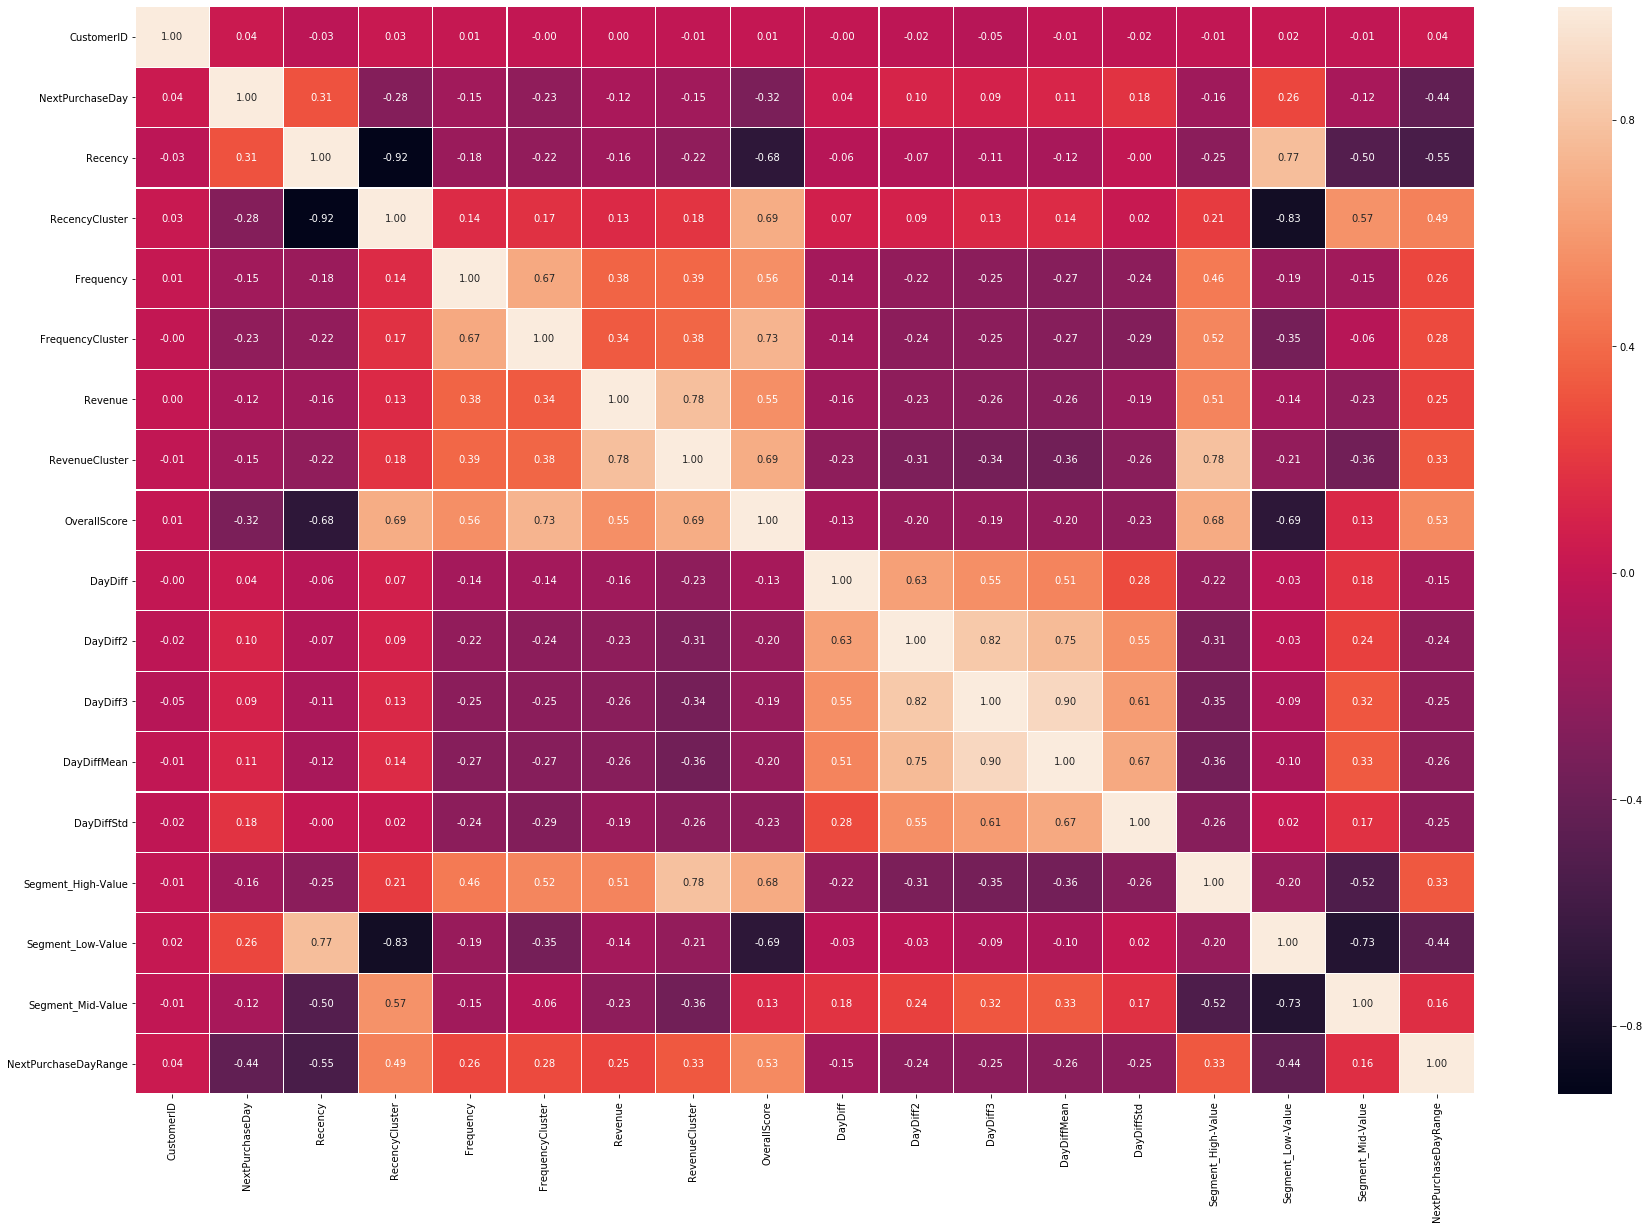

In [106]:
corr = tx_class[tx_class.columns].corr()
plt.figure(figsize = (30,20))
sns.heatmap(corr, annot = True, linewidths=0.2, fmt=".2f")

In [107]:
#train & test split
tx_class = tx_class.drop('NextPurchaseDay',axis=1)
X, y = tx_class.drop('NextPurchaseDayRange',axis=1), tx_class.NextPurchaseDayRange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

#create an array of models
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))

#measure the accuracy 
for name,model in models:
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    print(name, cv_result)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

d:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

d:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The

LR [0.59205776 0.52173913]
NB [0.55595668 0.62318841]
RF [0.55956679 0.56884058]
SVC [0.48375451 0.47463768]
Dtree [0.55234657 0.60869565]
XGB [0.59566787 0.59782609]
KNN [0.50180505 0.45289855]


In [108]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.63


In [109]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(), 
param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv= 5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.5786593933382924)

In [110]:
#Predicting for training set
train_p1 = xgb_model.predict(X_test)
train_p1

array([2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2, 0, 1,
       2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1,
       0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2,
       0, 0, 0, 0, 0, 0, 2], dtype=int64)

In [111]:
print(classification_report(train_p1, y_test))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        72
           1       0.40      0.57      0.47        35
           2       0.60      0.47      0.53        32

    accuracy                           0.63       139
   macro avg       0.60      0.59      0.59       139
weighted avg       0.66      0.63      0.64       139



In [112]:
from bayes_opt import BayesianOptimization

In [113]:
#Converting the dataframe into XGBoostâ€™s Dmatrix object
dtrain = xgb.DMatrix(X_train, label=y_train)

In [114]:
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate):
    params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'subsample': 0.8,
              'eta': 0.1,
              'eval_metric': 'rmse'}
    #Cross validating with the specified parameters in 5 folds and 70 iterations
    cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=5)
    #Return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [115]:
#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10), 
                                             'gamma': (0, 1),
                                             'learning_rate':(0, 1),
                                             'n_estimators':(100,120)
                                            })

In [116]:
xgb_bo.maximize(n_iter=5, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... |
-------------------------------------------------------------------------
|  1        | -0.717    |  0.9458   |  0.823    |  6.86     |  102.6    |
|  2        | -0.6918   |  0.8371   |  0.7408   |  7.246    |  105.1    |
|  3        | -0.757    |  0.2693   |  0.8601   |  3.821    |  106.0    |
|  4        | -0.6357   |  0.6423   |  0.3387   |  3.471    |  110.4    |
|  5        | -0.6164   |  0.04421  |  0.1922   |  3.957    |  118.4    |
|  6        | -0.5959   |  0.7969   |  0.06152  |  8.86     |  112.1    |
|  7        | -0.6739   |  0.313    |  0.699    |  4.521    |  112.7    |
|  8        | -0.6794   |  0.08598  |  0.5341   |  3.548    |  108.8    |
|  9        | -0.8133   |  1.0      |  0.0      |  10.0     |  100.0    |
|  10       | -0.8133   |  1.0      |  0.0      |  10.0     |  120.0    |
|  11       | -0.8133   |  1.0      |  0.0      |  3.0      |  120.0    |
|  12       | -0.8133   |  0.0      | 

In [117]:
params = xgb_bo.max['params']
print(params)

{'gamma': 0.7969147465285769, 'learning_rate': 0.061523653716619164, 'max_depth': 8.85965877092399, 'n_estimators': 112.10559007608407}


In [118]:
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])

In [119]:
classifier2 = xgb.XGBClassifier(**params).fit(X_train, y_train)

In [120]:
train_p2 = classifier2.predict(X_test)

In [121]:
print(classification_report(train_p2, y_test))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        73
           1       0.46      0.62      0.53        37
           2       0.60      0.52      0.56        29

    accuracy                           0.67       139
   macro avg       0.64      0.63      0.63       139
weighted avg       0.70      0.67      0.68       139



In [122]:
cm = confusion_matrix(train_p2, y_test)
acc = cm.diagonal().sum()/cm.sum()
print(acc)


0.6690647482014388


In [123]:
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(classifier2.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(classifier2.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.99
Accuracy of XGB classifier on test set: 0.67
